In [2]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
img = image.load_img("train/person/3.jpg")

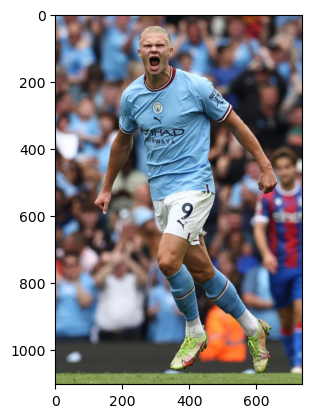

In [4]:
plt.imshow(img)

In [5]:
cv2.imread("train/person/3.jpg")

array([[[208, 169, 114],
        [212, 173, 118],
        [218, 178, 120],
        ...,
        [132,  99,  73],
        [131,  98,  72],
        [128,  97,  72]],

       [[214, 175, 120],
        [217, 178, 123],
        [223, 182, 127],
        ...,
        [134, 101,  75],
        [131, 101,  74],
        [130,  99,  74]],

       [[219, 179, 126],
        [222, 182, 129],
        [226, 186, 133],
        ...,
        [133, 102,  77],
        [132, 101,  76],
        [131,  99,  76]],

       ...,

       [[ 66, 140, 116],
        [ 67, 141, 117],
        [ 69, 143, 119],
        ...,
        [ 95, 159, 137],
        [100, 162, 140],
        [103, 162, 141]],

       [[ 60, 134, 110],
        [ 62, 136, 112],
        [ 65, 139, 115],
        ...,
        [ 95, 157, 135],
        [ 99, 161, 139],
        [101, 160, 139]],

       [[ 40, 114,  90],
        [ 42, 116,  92],
        [ 45, 119,  95],
        ...,
        [ 76, 138, 116],
        [ 80, 142, 120],
        [ 82, 141, 120]]

In [6]:
cv2.imread("train/person/3.jpg").shape

(1103, 735, 3)

In [7]:
train = ImageDataGenerator(rescale= 1/255)
validate = ImageDataGenerator(rescale= 1/255)

In [8]:
train_dataset = train.flow_from_directory('train/',
                                         target_size = (200,200),
                                         batch_size = 3,
                                         class_mode = 'binary')
validate_dataset = train.flow_from_directory('validate/',
                                         target_size = (200,200),
                                         batch_size = 3,
                                         class_mode = 'binary')

Found 17 images belonging to 2 classes.
Found 5 images belonging to 2 classes.


In [9]:
train_dataset.class_indices

{'animal': 0, 'person': 1}

In [10]:
train_dataset.classes

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [11]:
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3), activation = 'relu', input_shape =(200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    ##
                                    tf.keras.layers.Dense(1, activation= 'sigmoid')
])

In [12]:
model.compile(loss = 'binary_crossentropy',
             optimizer = RMSprop(learning_rate = 0.001),
             metrics = ['accuracy'])

In [26]:
model_fit = model.fit(train_dataset,steps_per_epoch = 3,
                     epochs = 30,
                     validation_data =  validate_dataset)

Epoch 1/30
3/3 [==============================] - 2s 550ms/step - loss: 2.2575e-04 - accuracy: 1.0000 - val_loss: 1.4241 - val_accuracy: 0.6000
Epoch 2/30
3/3 [==============================] - 2s 526ms/step - loss: 1.4637e-04 - accuracy: 1.0000 - val_loss: 1.4353 - val_accuracy: 0.6000
Epoch 3/30
3/3 [==============================] - 1s 497ms/step - loss: 7.1830e-05 - accuracy: 1.0000 - val_loss: 1.4256 - val_accuracy: 0.6000
Epoch 4/30
3/3 [==============================] - 1s 509ms/step - loss: 1.1666e-04 - accuracy: 1.0000 - val_loss: 1.4427 - val_accuracy: 0.6000
Epoch 5/30
3/3 [==============================] - 1s 488ms/step - loss: 5.3135e-05 - accuracy: 1.0000 - val_loss: 1.4627 - val_accuracy: 0.6000
Epoch 6/30
3/3 [==============================] - 1s 501ms/step - loss: 1.1539e-04 - accuracy: 1.0000 - val_loss: 1.4270 - val_accuracy: 0.6000
Epoch 7/30
3/3 [==============================] - 1s 502ms/step - loss: 2.8936e-05 - accuracy: 1.0000 - val_loss: 1.4404 - val_accuracy:

In [27]:
dir_path = 'test'

for i in os.listdir(dir_path ):
    print(i)

1.jpg
10.jpg
12.jpg
14.jpg
15.jpg
2.jpg
20.jpg
3.jpg
30.jpg
4.jpg
40.jpg
5.jpg
6.jpg
7.jpg
70.jpg
8.jpg
9.jpg


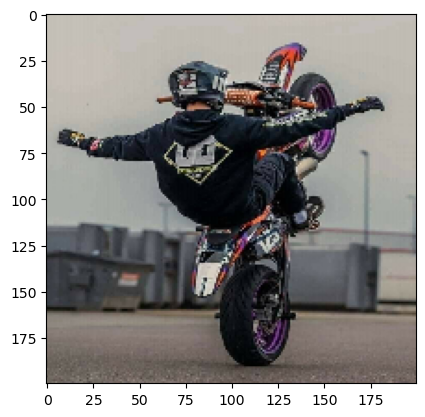

1/1 [==============================] - 0s 50ms/step
A person


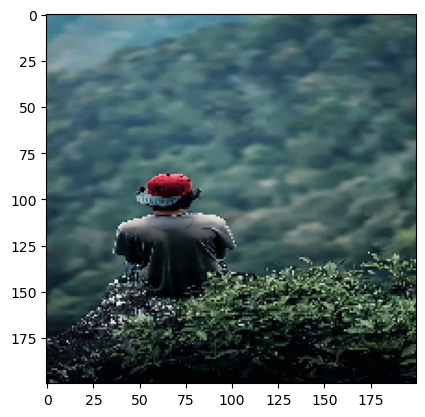

1/1 [==============================] - 0s 48ms/step
A person


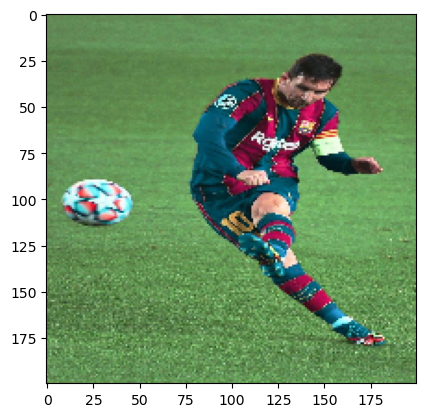

1/1 [==============================] - 0s 52ms/step
A person


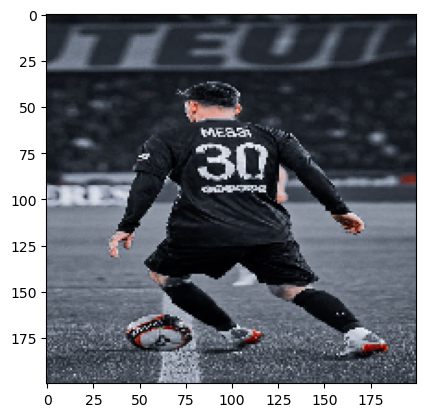

1/1 [==============================] - 0s 53ms/step
A person


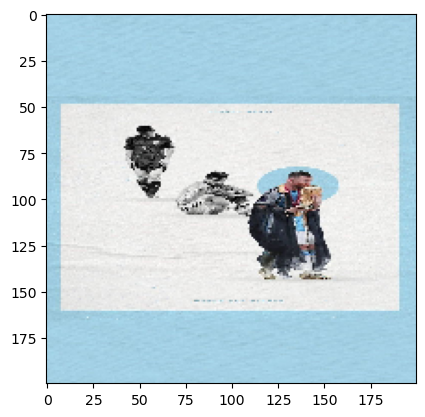

1/1 [==============================] - 0s 51ms/step
A person


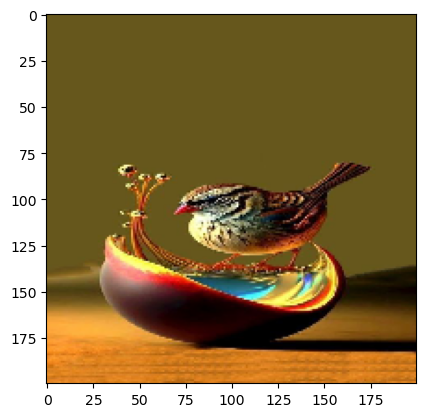

1/1 [==============================] - 0s 53ms/step
An animal


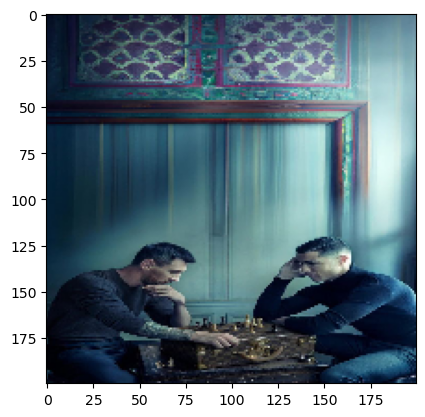

1/1 [==============================] - 0s 45ms/step
A person


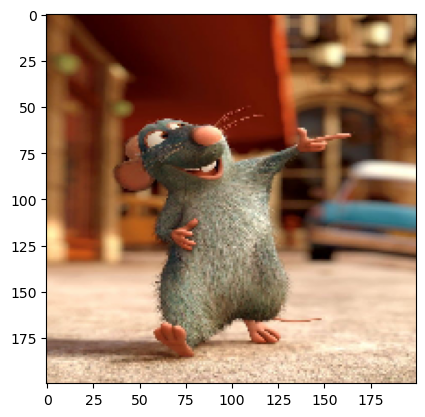

1/1 [==============================] - 0s 46ms/step
An animal


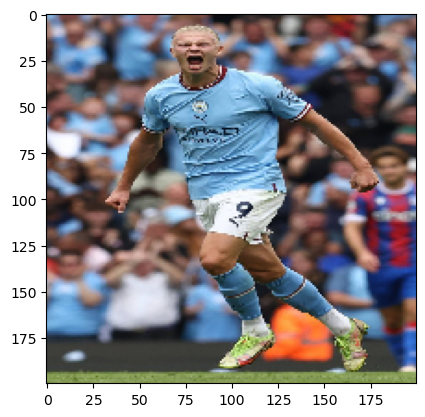

1/1 [==============================] - 0s 44ms/step
A person


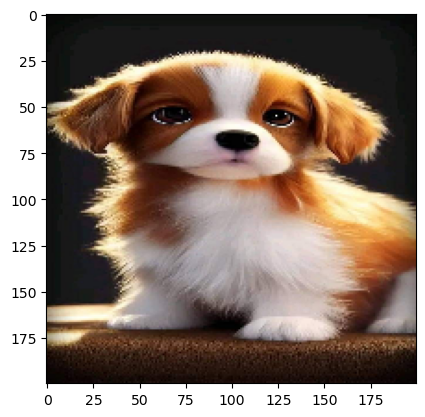

1/1 [==============================] - 0s 45ms/step
An animal


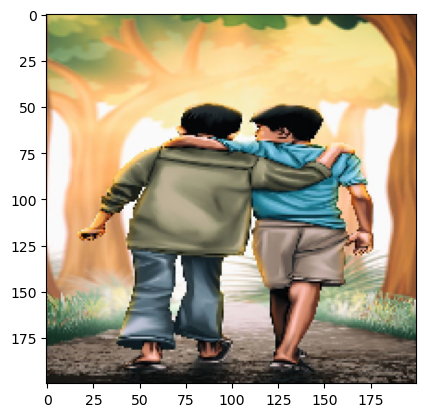

1/1 [==============================] - 0s 52ms/step
A person


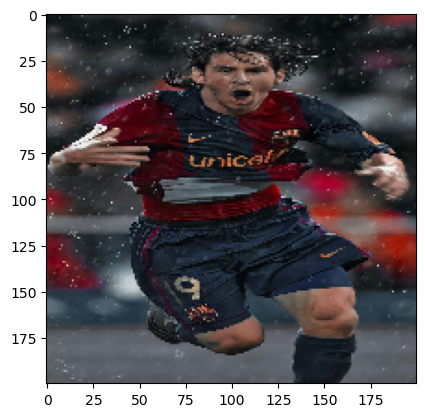

1/1 [==============================] - 0s 51ms/step
A person


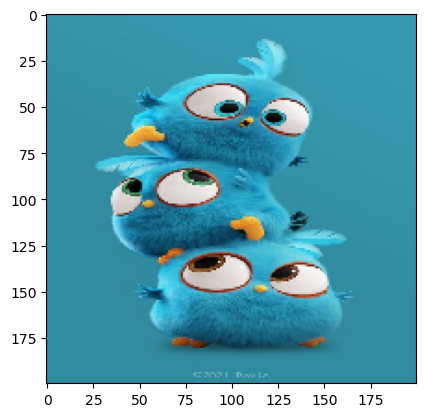

1/1 [==============================] - 0s 66ms/step
An animal


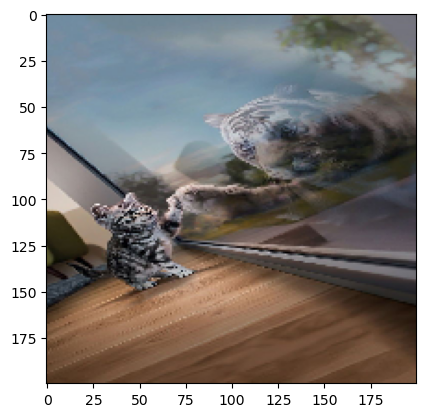

1/1 [==============================] - 0s 60ms/step
An animal


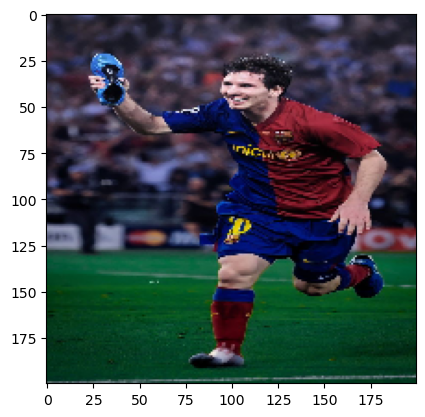

1/1 [==============================] - 0s 62ms/step
A person


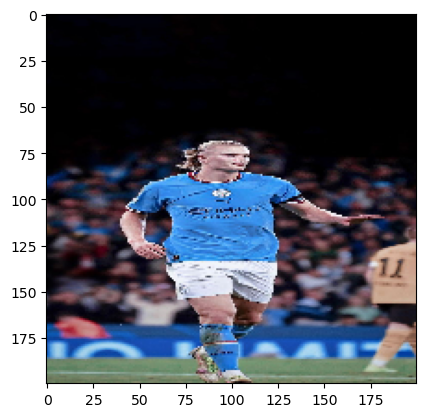

1/1 [==============================] - 0s 53ms/step
A person


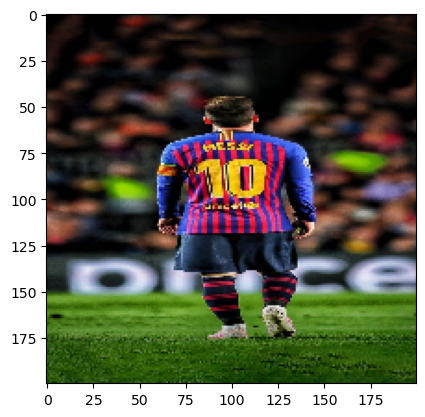

1/1 [==============================] - 0s 54ms/step
A person


In [28]:
dir_path = 'test'

for i in os.listdir(dir_path ):
    img = image.load_img(dir_path+'//'+i, target_size = (200, 200))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)
    X = np.expand_dims(X, axis = 0)
    images = np.vstack([X])
    val = model.predict(images)
    if val == 0:
        print("An animal")
    else:
        print("A person")